## Introduction to Common Distributions

### Parametric vs. Non-parametric Models

Parametric methods assume that the data can be represented using a model with a finite number of parameters. The number of parameters is bounded and as a result is inflexible for modeling data when the size of the data grows. In non-parametric methods we do not model the data with a preset number of parameters. The number of parameters here grow with the size of the data and as a result can be quite flexible in modeling complex phenomena.

### Parametric Methods

In [6]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import scipy
from scipy.special import gamma, factorial, comb
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [20]:
INTERACT_FLAG = True

#### Note: Some of the sliders for interaction are currently only coded to take integer parameters

### Binomial distribution

The binomial distribution can be used to describe the number of successes 'p' in 'n' total events and is given by the sampling probability (Each draw is an independent Bernoulli event)

$$P(y | \theta) =   nCp \cdot \theta^p \cdot (1 - \theta)^{n-p}$$

Here \\(\theta\\) is the probability of success of the event. 

$$Mean = n\theta$$

$$Variance = n \theta (1 - \theta) $$

**Example**

This can be used to model the number of successful outcomes in a drug trial.

**Conditions**

* Discrete data
* Two possible outcomes for each trial
* Each trial is independent 
* The probability of success/failure is the same in each trial

In [21]:
def binomial_vector_over_y(theta, n):
    total_events = n
    y =  np.linspace(0, total_events , total_events + 1)
    p_y = [comb(int(total_events), int(yelem)) * theta** yelem * (1 - theta)**(total_events - yelem) for yelem in y]

    fig = px.line(x=y, y=p_y, color_discrete_sequence=["steelblue"], 
                  height=600, width=800, title=" Binomial distribution for theta = %lf, n = %d" %(theta, n))
    fig.data[0].line['width'] = 4
    fig.layout.xaxis.title.text = "y"
    fig.layout.yaxis.title.text = "P(y)"
    fig.show()
    
    
if(INTERACT_FLAG):    
    interact(binomial_vector_over_y, theta=0.5, n=15)
else:
    binomial_vector_over_y(theta=0.5, n=10)

interactive(children=(FloatSlider(value=0.5, description='theta', max=1.5, min=-0.5), IntSlider(value=15, desc…

### Negative Binomial Distribution
A negative binomial distribution can be used to describe the number of successes 'r - 1' and 'x' failures in 'x + r -1' trials, until you have a success on the 'x + r'th trial. Rephrased, this models the number of failures (x) you would have to see before you see a certain number of successes (r). The Probability Density Function (PDF) for a negative binomial distribution modeling the number of failures is given by

$$P(x| \theta) = {x + r - 1 \choose r - 1} \: \theta^r  (1- \theta)^x$$

where \\(\theta\\) is the probability of success

$$mean = r ( 1- \theta) / \theta $$

$$variance = r ( 1- \theta) / \theta^2 $$

##### Similarity to a Poisson Distribution

Can be used to model phenomenon that a Poisson distribution can but where the mean = variance criterion no longer holds. Hence this distribution is sometimes called the overdispersed Poisson. There is an alternate parameterization where the inverse dispersion parameter \\(\kappa\\) is used. If the Poisson distribution is parameterized by the rate parameter \\(\lambda\\), the negative binomial distribution can be shown to have a variance given by

$\lambda + \dfrac{\lambda^2}{\kappa}$

**Example**

The negative binomial distribution can be used to measure the number of days your car would work before it breaks down for the 3rd time. Note that here the failure event is the car running properly and the success event is defined as the car breaking down! 

**Conditions**

* Count of discrete events
* The events CAN be non-independent, implying that events can influence or cause other events
* Variance can exceed the mean

The example below illustrates the answer to the question "What is the probability of seeing 'x' failures when a number of events = total_events has occurred, when I know the probability of success is \\(\theta\\)?"

In [22]:
def negative_binomial_vector_over_y(theta, total_events):
    # total_events = x + r
    # for a fixed number of events, what is the probability of seeing 'x' failures
    # number of successes 'r' is therefore total_events - x
    # theta is the probability of the success event
    
    x =  np.linspace(0, total_events , total_events + 1)
    p_x = [comb(int(total_events - 1), int(total_events - xelem - 1)) * theta** (total_events - xelem) * (1 - theta)**(xelem) for xelem in x]

    fig = px.line(x=x, y=p_x, color_discrete_sequence=["steelblue"], 
                  height=600, width=800, title="Negative Binomial distribution for theta = %lf, total_events = %d" %(theta, total_events))
    fig.data[0].line['width'] = 4
    fig.layout.xaxis.title.text = "x = number of failures"
    fig.layout.yaxis.title.text = "P(x)"
    fig.show()
    
    
   
if(INTERACT_FLAG):    
    interact(negative_binomial_vector_over_y, theta=0.9, total_events=15)
else:
    negative_binomial_vector_over_y(theta=0.9, total_events=15)

interactive(children=(FloatSlider(value=0.9, description='theta', max=2.7, min=-0.9), IntSlider(value=15, desc…

### Poisson distributions 

Poisson distributions are discrete distributions that indicate the probability of a number of events

$$P(y|\theta) = \theta^y  e^{-\theta} / y!$$

The mean and variance of a Poisson distribution are both given by the rate parameter \\(\theta\\), resulting in the distribution growing wider as the mean moves away from zero.

If we notice 'n' observations that are drawn from a distribution with the underlying parameter \\(\theta\\), the joint distribution for this can be written as

$$P(Y_1 = y_1, Y_2 = y_2, ... Y_n = y_n) =  \theta^{\sum y_i} e^{-n \theta} / (y_1! ... y_n!)$$

**Example**

* The number of accidents at an intersection can be modeled using a Poisson distribution.
* The number of Salmonella outbreaks in a year


**Conditions**
* Discrete non-negative data - count of events, the rate parameter can be a non-integer positive value
* Each event is independent of other events
* Each event happens at a fixed rate
* A fixed amount of time in which the events occur

In [23]:
def poisson_vector(theta, y_end):
    y = np.linspace(0,y_end,y_end+1)
    
    p_theta = (theta**y * np.exp(-theta)) / factorial(y)

    # y is the number of events
    # y_end is how far you want to compute y values
    fig = px.line(x=y, y=p_theta, color_discrete_sequence=["steelblue"], 
                  height=600, width=800, title=" Poisson distribution for theta = %d" %(theta))
    fig.data[0].line['width'] = 4
    fig.layout.xaxis.title.text = "y"
    fig.layout.yaxis.title.text = "P(y)"
    fig.show()
   

if(INTERACT_FLAG == True):
    interact(poisson_vector, theta=7, y_end=20)
else:
    poisson_vector(theta=7, y_end=20)

interactive(children=(IntSlider(value=7, description='theta', max=21, min=-7), IntSlider(value=20, description…

### Exponential distribution

The exponential distribution is a special case of the Gamma distribution. An exponential distribution (continuous distribution) has the PDF given by

$$P(x) = \lambda e^{-\lambda x}$$

Here \\(\lambda\\) is called the rate parameter and can be used to model the duration of events, for e.g. the length of a phone call can be modeled as exponential distribution. There is a relationship between the \\(\lambda\\) that we see here and the one that is used as the rate parameter in the Poisson distribution. This can be used to relate the count of events in a certain amount of time and the time between consecutive events. If the number of epidemics per year is modeled by a Poisson distribution with parameter \\(\lambda_{1}\\), the time between the epidemics can be modeled by an exponential distribution with parameter \\(\lambda_{2} = \dfrac{1}{\lambda_{1}}\\) 

$$ mean = \dfrac{1}{\lambda} $$

$$ variance = \dfrac{1}{\lambda^2} $$

**Example**

Time to failure for the radiator in a car.

**Conditions**

* Continuous non-negative data
* Time between events are considered to happen at a constant rate
* Events are considered to be independent

In [24]:
def exponential_distribution(lambda_rate, x_end):
    
    x =  np.linspace(0,x_end,x_end*4)
    
    p_x = lambda_rate * np.exp(-lambda_rate * x)
    
    fig = px.line(x=x, y=p_x, color_discrete_sequence=["steelblue"], 
                  height=600, width=800, title=" Exponential distribution for lambda = %lf" %(lambda_rate))
    fig.data[0].line['width'] = 4
    fig.layout.xaxis.title.text = "x"
    fig.layout.yaxis.title.text = "P(x)"
    fig.show()

if(INTERACT_FLAG):
    interact(exponential_distribution, lambda_rate = 4, x_end=20)
else:
    exponential_distribution(lambda_rate = 0.2, x_end=20)

interactive(children=(IntSlider(value=4, description='lambda_rate', max=12, min=-4), IntSlider(value=20, descr…

### Gamma Distribution

The Gamma distribution is used to model the time taken for 'n' independent events to occur. It can be derived from the CDF of a Poisson distribution by computing the probability of a number of events given by 'a' in time 'x'. The Gamma distribution models the wait time 'x' (postive value) and is given by the PDF

$$P(x) = \dfrac{b^a}{\gamma(a)} \cdot x^{a - 1} e^{-b x} $$

Here 'a' is the shape parameter and 'b' is the rate parameter, or the inverse scale parameter, of the distribution (same as the rate parameter of the Poisson distribution from which this distribution is derived)  such that

$$ a> 0$$

and

$$b > 0$$

##### Interpretation
The shape parameter 'a' can be interpreted as the number of events that we are waiting on to happen. The rate parameter 'b', as the name indicates, is the rate at which events happen. In the case where a = 1, or we are waiting for the first event to happen, we get the exponential distribution

$$ mean = a/b $$

$$ variance = a/b^2 $$

**Example**

It can be used to model the time taken for 4 bolts in your car to fail.

**Conditions**

* Continuous non-negative data
* A generalization of the exponential distribution, but more parameters to fit (With great flexibility, comes great complexity!)
* An exponential distribution models the time to the first event, the Gamma distribution models the time to the 'n'th event.

In [25]:
def gamma_individual(a, b, x_max):
    x = np.arange(0,x_max,0.1)
    
    term = b**a /gamma(a)
    p_x = term * x**(a - 1) * np.exp(-b * x)
    
    fig = px.line(x=x, y=p_x, color_discrete_sequence=["steelblue"], 
                  height=600, width=800, title=" Gamma distribution for a (num events) = %d, b (rate of events) = %d" %(a, b))
    fig.data[0].line['width'] = 4
    fig.layout.xaxis.title.text = "x (wait times)"
    fig.layout.yaxis.title.text = "P(x)"
    fig.show()
    
if(INTERACT_FLAG):    
    interact(gamma_individual,a=2,b=1,x_max=10)
else:
    gamma_individual(2,1,10)

interactive(children=(IntSlider(value=2, description='a', max=6, min=-2), IntSlider(value=1, description='b', …

### Normal distribution (Gaussian)

This is possibly the most popular distribution of all! The normal distribution is parameterized by a 

$$ mean = \mu$$ 

$$standard\;deviation = \sigma$$

and its PDF is given by

$$P(x) = \dfrac{1}{\sqrt{2 \pi \sigma}} e^{- (x - \mu)^2 / 2 \sigma^2}$$

This is also called a Gaussian distribution. A normal distribution is found in many physical phenomena and has significance as a result of the **Central Limit Theorem**, which states that the mean of different sets of samples \\(X_1,X_2,..X_n\\) (each with k samples) converges to a normal distribution. The conditions for the Central Limit Theorem to hold are: 

1. The samples must come from random variables that have finite mean and variance

2. The sample size must be large enough, i.e. \\(k \rightarrow \infty \\)

The implication of this is that a physical process represented by a random variable $A$ is the result of the sum of random variables \\(B_1, B_2,..B_n\\) will have a normal distribution irrespective of the type of distribution to which \\(B_1, B_2...B_n\\) belongs. 

The square of the standard deviation is called the variance of the normal distribution and the inverse of the variance is called the precision. Three standard deviations from the mean on either direction gives you 99.73% of the mass in a PDF. This may not be a good distribution to use for data that may have a lot of outliers, one of the heavy-tailed distributions such as a Student's t-distribution is a better fit for such data. It is also the distribution that has the maximum amount of uncertainty given a certain mean and variance.

**Example**

The heights of men in your state can be represented by a normal distribution

**Conditions**

* Continuous data
* Unbounded distribution
* Outliers are minimal


In [26]:
import math

def normal_distribution(mean, sigma):
    
    x =  np.linspace(-4*sigma + mean ,4*sigma + mean, 50*sigma)
    
    p_x =  np.exp(-(x - mean)**2 / (2*sigma*sigma)) / (sigma * np.sqrt(2.0 * math.pi ))
    
    fig = px.line(x=x, y=p_x, color_discrete_sequence=["steelblue"], 
                  height=600, width=800, title=" Exponential distribution for mean = %lf, sigma = %lf" %(mean, sigma))
    fig.data[0].line['width'] = 4
    fig.layout.xaxis.title.text = "x"
    fig.layout.yaxis.title.text = "P(x)"
    fig.show()

if(INTERACT_FLAG):
    interact(normal_distribution, mean = 4, sigma = 3)
else:
    normal_distribution(mean = 5, sigma = 4)

interactive(children=(IntSlider(value=4, description='mean', max=12, min=-4), IntSlider(value=3, description='…

### Lognormal distribution

If Y is a normal distribution parameterized by the mean \\(\mu\\) and standard deviation \\(\sigma\\), then X given by

$$X = e^Y$$

is a Lognormal distribution. In other words, X can be considered a lognormal distribution if the log of X is normally distributed. Here \\(\mu\\) and \\(\sigma\\) are the parameters of the lognormal distribution X but **not the actual mean and standard deviation** of X. If a mean $\mu_X$ and standard deviation \\(\sigma_X\\) are desired for the lognormal distribution, we can set the paramters \\(\mu\\) and \\(\sigma\\) to be

$$\mu = ln ( \dfrac{\mu_X^2}{\sqrt{\mu_X^2 + \sigma_X^2}})$$

$$\sigma = ln( 1 + \dfrac{\sigma_X^2}{\mu_X^2})$$

The mode of the lognormal distribution is given by 

$$mode = e^{\mu - \sigma^2}$$

If you would like to design a lognormal distribution to have a certain mode, you can set the mean \\(\mu\\) for a selected standard deviation as described below

$$\mu = ln(mode) + \sigma^2$$

The PDF for a lognormal distribution is given by

$$P(x) = \dfrac{1}{x \sigma \sqrt{2 \pi }} e^{- (ln(x) - \mu)^2 / 2 \sigma^2}$$

**Example**

This can be used to model the disease parameters such as the reproduction number for epidemics.

**Conditions**

1. Continuous non-negative values
2. Asymmetric unlike the Normal distribution

In [27]:
import math

def lognormal_distribution(mean, sigma):
    
    x =  np.linspace(0.1,2.5,100)
    
    p_x =  np.exp(-(np.log(x) - mean)**2 / (2*sigma*sigma)) / (x * sigma * np.sqrt(2.0 * math.pi ))
    
    mode = np.exp(mean - sigma**2)
    fig = px.line(x=x, y=p_x, color_discrete_sequence=["steelblue"], 
                  height=600, width=800, title=" Lognormal distribution for mean = %lf, sigma = %lf, mode = %lf" %(mean, sigma, mode))
    fig.data[0].line['width'] = 4
    fig.layout.xaxis.title.text = "x"
    fig.layout.yaxis.title.text = "P(x)"
    fig.show()


# OPTION 1, if you want to provide the lognormal mean_x and std deviation_x
# OPTION 2, if one wants to select a mean based on a desired mode of the lognormal distribution
# and a given standard deviation.

OPTION = 2

if(OPTION == 1):    
    mean_x = 2    # CHANGE THIS
    sigma_x = 2   # CHANGE THIS
    mean = np.log(mean_x**2 / (np.sqrt(mean_x**2 + sigma_x**2)))
    sigma = np.log(1 + (sigma_x**2 / mean_x**2))
else:
    sigma = 0.2   # CHANGE THIS
    mode = 0.8    # CHANGE THIS
    mean = np.log(mode + sigma**2)

#print("Mean %lf, sigma %lf, mode %lf "%(mean, sigma, mode))

if(INTERACT_FLAG):
    interact(lognormal_distribution, mean = 1, sigma = 0.25)
else:
    lognormal_distribution(mean = mean, sigma = sigma)

interactive(children=(IntSlider(value=1, description='mean', max=3, min=-1), FloatSlider(value=0.25, descripti…

### Student's t-distribution

#### Introduction 

The definition of the Generalized Student's t-distribution can be derived starting with a univariate Normal distribution \\(N(x | \mu, \tau^{-1})\\). The conjugate prior for the precision \\(\tau\\) (inverse of the variance) is given by a Gamma distribution \\(G(\tau | a,b)\\). (I am explicitly denoting the dependent variables and the parameters in the notation here to be clear). We can compute the marginal distribution for x by using the prior of the precision and integrating out the dependence of the Normal distribution on its precision over all values of precision from 0 to \\(\infty\\).

$$ p(x | \mu, a, b) = \int_0^{\infty} N(x | \mu, \tau^{-1}) \; G(\tau | a,b) \; d \tau $$

$$ p(x | \mu, a, b) = \dfrac{b^a}{\Gamma(a)} (\dfrac{1}{2 \pi})^{1/2} [ b + \dfrac{(x - \mu)^2}{2} ]^{-a - 1/2} \; \Gamma(a + 1/2) $$

The integral above has the following interpretation: a Student's t-distribution is made up of an infinite number of Gaussians with the same mean and differing variances, with the variances varying from 0 to infinity. The following new parameters are defined for the t-distribution in terms of the Gamma distribution parameters a and b

1. \\(ν = 2a\\)

2. \\( \lambda = a/b \\)

The PDF for the Generalized Student's t-distribution can hence be written as

$$ p(x | \mu, a, b) = \dfrac{\Gamma \dfrac{v+1}{2}}{\Gamma (v/2)} \sqrt{\dfrac{\lambda}{v \pi}} (1 + \dfrac{{\lambda(x - \mu)}^2}{v})^{-(v+1)/2}$$

where

* μ corresponds to the mean of the distribution
    
* \\( \lambda \\) corresponds to the precision of the distribution though it is generally not the same as the inverse of the variance of the distribution

* ν is the degrees of freedom and takes between 0 and \\(\infty\\). The degrees of freedom corresponds to the number of independent observations minus 1. When the sample size is 8, the distribution used to model this would have degrees of freedom set to 7. A value of 1 corresponds to the Cauchy distribution and indicates heavy tails, while infinity corresponds to a Normal distribution.

$$ mean = \mu $$

$$ variance = ν/(ν - 2) \lambda$$

The simplest form  of the probability density function for a zero-centered t-distribution is given by:

$$P(x) = \dfrac{\Gamma \dfrac{v+1}{2}}{\sqrt{v \pi} \Gamma (v/2)} (1 + \dfrac{x^2}{v})^{-(v+1)/2}$$

For the form of the distribution as shown above 

$$mean = 0$$

$$variance = ν/(ν - 2)$$
##### Alternative Interpretation

If we draw samples from a population that has a normal distribution, but whose standard deviation \\(\sigma\\) is not known to us then we can use a Student's t-distribution to describe the standardized distances of the sample mean (M) to the population mean (\\(\mu\\)). A Student's t-distribution is used where one would be inclined to use a Normal distribution, but a Normal distribution is susceptible to outliers whereas a t-distribution is more robust. 

If we sample from a population, there are two ways in which the sample mean (M) could be different from the true mean \\(\mu\\)

* M is too high
* M is too low

M can be close to \\(\mu\\) in which case we were lucky

The estimate of the standard deviation $\sigma$ can be obtained from the samples as $s_m$. 

* \\(s_m\\) has to be smaller than $\sigma$ unless the sample is extensive and covers the full range of values of the distribution (support) 

The Student's t-distribution can be used to quantify how much smaller this is. 


**Example**

* A distribution of test scores from an exam which has a significant number of outliers and would not be appropriate for a Normal distribution
* Use a Cauchy distribution with ν = 1 to model extreme observations for rare events (black swan, Nassim Taleb)

**Conditions**

* Continuous data
* Unbounded distribution
* Considered an overdispersed Normal distribution, mixture of individual normal distributions with different variances

In [29]:
def studentst_distribution(v):
    
    t =  np.linspace(-10,10,100)
    
    term1 = gamma((v + 1)/2) / (np.sqrt(v * math.pi) * gamma(v/2))
    term2 = (1 + t**2 / v)**(-(v + 1)/2)
    p_t = term1 * term2
    
    fig = px.line(x=t, y=p_t, color_discrete_sequence=["steelblue"], 
                  height=600, width=800, title=" Student's t-distribution for v = %lf" %(v))
    fig.data[0].line['width'] = 4
    fig.layout.xaxis.title.text = "t"
    fig.layout.yaxis.title.text = "P(t)"
    fig.show()
    
if(INTERACT_FLAG == True):    
    interact(studentst_distribution, v=10)
else:
    studentst_distribution(v=10)

interactive(children=(IntSlider(value=10, description='v', max=30, min=-10), Output()), _dom_classes=('widget-…

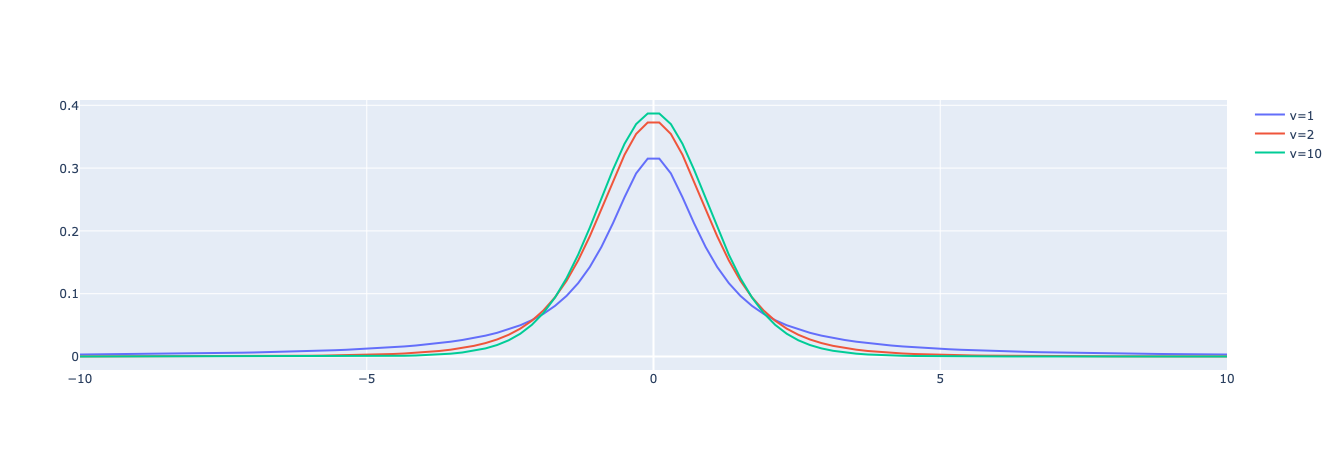

In [143]:
import plotly.graph_objects as go


t =  np.linspace(-10,10,100)
fig = go.Figure()

v = 1
term1 = gamma((v + 1)/2) / (np.sqrt(v * math.pi) * gamma(v/2))
term2 = (1 + t**2 / v)**(-(v + 1)/2)
p_t = term1 * term2

#fig.add_trace(go.Scatter(x=t, y=p_t, line=go.scatter.Line(color="gray"), showlegend=True))
fig.add_scatter(x=t, y=p_t, name="v=1", mode="lines")

v = 4
term1 = gamma((v + 1)/2) / (np.sqrt(v * math.pi) * gamma(v/2))
term2 = (1 + t**2 / v)**(-(v + 1)/2)
p_t2 = term1 * term2

#fig.add_trace(go.Scatter(x=t, y=p_t2, line=go.scatter.Line(color="blue"), showlegend=True))

fig.add_scatter(x=t, y=p_t2, name="v=2", mode="lines")

v = 10
term1 = gamma((v + 1)/2) / (np.sqrt(v * math.pi) * gamma(v/2))
term2 = (1 + t**2 / v)**(-(v + 1)/2)
p_t2 = term1 * term2

#fig.add_trace(go.Scatter(x=t, y=p_t2, line=go.scatter.Line(color="blue"), showlegend=True))

fig.add_scatter(x=t, y=p_t2, name="v=10", mode="lines")

### Beta distribution

The Beta distribution is a distribution over a probability, therefore the range of values it takes as input is from 0 to 1. Beta distribution is the conjugate prior of a binomial distribution. A class of conjugate priors for a sampling model \\(P(y | \theta)\\) is one that makes the posterior \\(P(\theta |y)\\) have the same form as the prior. The PDF for a Beta distributions is shown below.

$$P(\theta | a, b) = \dfrac{\gamma(a + b)}{\gamma(a) \gamma(b)} \cdot \theta^{a - 1} \cdot (1 - \theta)^{b -1}$$

This means that if we have a beta prior and a likelihood that has a binomial form, the posterior will have a beta distribution. Not only do we know the form, we can compute the posterior exactly in closed form

$$ Prior\;for\;\theta = P(\theta) = Beta(a,b) $$

$$ Sampling\; distribution = P(y|\theta) = Binomial(num_p, total) $$

$$ Posterior\;for\;\theta = P(\theta|y) = Beta(num_p + a, total - num_p +b) $$

where the observed data 'y' is represented by \\(num_p\\) and \\(total\\). The parameter \\(\theta\\) is associated with the success event represented by \\(num_p\\). \\(num_p\\) is the number of positive events and \\(total\\) is the total number of events. Here 'a' and 'b' can be considered pseudo counts. Setting a = 1 and b = 1 gives you a uniform distribution.

The mean and variance for Beta(a,b) is given by

$$ Mean = \dfrac{a}{a +b} $$

$$ Variance = \dfrac{ab}{(a + b)^2(a + b + 1)} $$

**Example**

* [Baseball batting averages](http://varianceexplained.org/statistics/beta_distribution_and_baseball/) The Beta distribution can be used as a prior distribution, as shown above, for modeling the batting average \\(\theta\\) in baseball. For a new player, since we have no information we can rely on historical batting averages to form a prior. Since batting averages are known to be in a certain range, we use that information to define a Beta prior for \\(\theta\\). The number of hits and misses can be represented by a binomial distribution. After every game, the posterior for \\(\theta\\) can be computed from these values. The posterior value for theta can then be used as the prior for tbe next game.

**Conditions**

* Takes positive values between 0 and 1 as input
* Setting a and b to 1 gives you a uniform distribution



In [28]:
# Beta posterior with uniform Beta prior, a=1, b=1
def beta_vector_theta(num_p, total, a, b):
    
    alpha = num_p + a
    beta = total - num_p + b
    theta =  np.linspace(0,1,25)
    
    print("Posterior a =",alpha)
    print("Posterior b =",beta)
    
    term = gamma(alpha + beta) / ( gamma(alpha) * gamma(beta) )
    p_theta = term * theta**(alpha - 1) * (1 - theta)**(beta - 1)
    
    fig = px.line(x=theta, y=p_theta, color_discrete_sequence=["steelblue"], 
                  height=600, width=800, title=" Beta distribution for total number of events=%d, number of positive events=%d" %(total, num_p))
    fig.data[0].line['width'] = 4
    fig.layout.xaxis.title.text = "theta"
    fig.layout.yaxis.title.text = "P(theta)"
    fig.show()

if(INTERACT_FLAG):
    interact(beta_vector_theta, num_p = 4, total=10, a=1, b=1)
else:
    beta_vector_theta(num_p = 4, total=10, a=1, b=1)

interactive(children=(IntSlider(value=4, description='num_p', max=12, min=-4), IntSlider(value=10, description…

### GRADED EVALUATION (27 mins)

1. What percentage of the area under a PDF is given by 1 standard deviation on either side of the Normal distribution?

     a. 68.27
 
     b. 75


2. What percentage of the area under a PDF is given by 2 standard deviation on either side of the Normal distribution?

     a. 95.45
 
     b. 97.45
     

3. Which of the following distributions has the maximum entropy given a certain mean and variance?

     a. Normal
 
     b. Student's t-distribution
     

4. The Beta distribution is the conjugate prior of

    a. Binomial distribution
    
    b. Exponential distribution
    
    
5. In a Poisson distribution, the mean and variance are given by the same parameter

    a. True
    
    b. False


6. The exponential distribution can be used to model the length of events

    a. True
    
    b. False
   
   
7. A Student's t-distribution is less robust to outliers compared to a Normal distribution.

    a. True 
    
    b. False
    

8. X can be considered a lognormal distribution if the log of X is normally distributed

    a. True
    
    b. False 
    
    
9. The binomial distribution can be used to describe the number of successes ‘p’ in ‘n’ total events

    a. True
    
    b. False

### Generate Data

Text(0.5, 1.0, '2-d Distribution, Outlier Distribution in Red ')

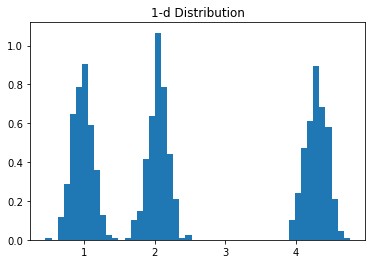

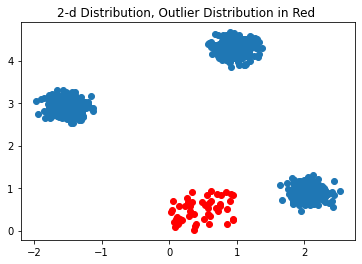

In [199]:
import sklearn
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture
import numpy as np
from matplotlib import pyplot as plt

# Make 1D Gaussian data, with given number of clusters
x, x_label = make_blobs(n_samples=1000 , n_features=1, centers=3, cluster_std=0.15, random_state=0)
# Make 2D Gaussian data, with given number of clusters
x2, x2_label = make_blobs(n_samples=1000 , n_features=2, centers=3, cluster_std=0.15, random_state=0)
# Make random 2D Gaussian data for outlier data
x3 = np.random.rand(50,2)

plt.hist(x, bins=50, density=True)
plt.title("1-d Distribution")
plt.figure()
plt.scatter(x2[:,0], x2[:,1])
plt.scatter(x3[:,0], x3[:,1], color='red')
plt.title("2-d Distribution, Outlier Distribution in Red ")

### Maximum Likelihood Estimation

The Maximum Likelihood Estimate (MLE) can be computed by optimizing or maximizing the likelihood function for the distribution parameters. This is usually done by maximizing the log-likelihood for numerical stability. The Scipy 'stats' module has distributions with a 'fit' method that performs this MLE calculation. An example with a Normal or Gaussian distribution is shown below. 

#### Parameter Estimation for Normal Distribution

In [146]:
from scipy.stats import norm

loc, scale = norm.fit(x[x_label == 0])
print("Mean and scale of the Gaussian distribution is ", loc, scale)

Mean and scale of the Gaussian distribution is  0.9726197926685909 0.14658742203060857


The following example illustrates the posterior distribution for a parameter given a prior for the parameter and a likelihood distribution for the data. The problem here has the data being drawn from a Binomial distribution. The parameter \\(\theta\\) can be drawn from a Beta prior distribution. Because the Beta prior is a conjugate prior for a Binomial likelihood, the posterior also takes the form of a Beta distribution. 

To summarize the data likelihood given by

$$ Binomial\,likelihood(m | N, \theta)$$

where the parameter for the Binomial distribution is given by \\(\theta\\) and 'N' represents the total number of trials in a binomial experiment and 'm' represents the total number of successes (probability of success = \\(\theta\\)). Since it is a likelihood, we are trying to determine the probability of the success 'm' given the dsitribution parameter \\(\theta\\). We can define the number of failures as \\(l = N - m\\). Then the posterior given this likelihood and prior is given by


$$ Beta\,prior(\theta|a,b) + Binomial\,likelihood(m | N, \theta) \longrightarrow Beta\,posterior(\theta|m+a,l+b) $$



In [31]:
from plotly.subplots import make_subplots
from scipy import stats

def beta_binomial_likelihood(theta, N):
    total_events = N
    m =  np.linspace(0, total_events , total_events + 1)
    binomial_likelihood = [comb(int(total_events), int(yelem)) * theta** yelem * (1 - theta)**(total_events - yelem) for yelem in m]

    fig = make_subplots(rows=1, cols=1)
    
    #fig = px.line(x=y, y=binomial_theta, color_discrete_sequence=["steelblue"], 
                  #height=600, width=800, title="Binomial likelihood")
    fig.add_scatter(x=m, y=binomial_likelihood, row=1, col=1)
    fig.data[0].line['width'] = 4
    fig.layout.xaxis.title.text = "m(number of success events)"
    fig.layout.yaxis.title.text = "P(m)"
    fig.layout.title = "Binomial distribution vs. the number of successes, for theta = %lf"%(theta)
    fig.show()
    

def beta_binomial(N, m, prior_alpha, prior_beta):
    
    alpha = prior_alpha
    beta = prior_beta
    theta =  np.linspace(0,1,50)
    
    binomial_prob = [comb(int(N), int(m)) * theta_elem** m * (1 - theta_elem)**(N - m) for theta_elem in theta]

    fig = make_subplots(rows=1, cols=2, subplot_titles=("Binomial Likelihood", "Beta Prior and Posterior"))
    
    fig.add_scatter(x=theta, y=binomial_prob, name="Likelihood", row=1, col=1)
    fig.data[0].line['width'] = 4
    fig.layout.xaxis.title.text = "theta"
    fig.layout.yaxis.title.text = "P(theta)"
    
    def beta_dist(alpha, beta):
        
        term = gamma(alpha + beta) / ( gamma(alpha) * gamma(beta) )
        beta_theta = term * theta**(alpha - 1) * (1 - theta)**(beta - 1)
        return(beta_theta)
    
    
    print("Beta Prior, alpha =",alpha)
    print("Beta Prior, beta =",beta)
    fig.add_scatter(x=theta, y=beta_dist(prior_alpha, prior_beta), name="Prior", row=1, col=2)
    print("Posterior alpha =",alpha + m)
    print("Posterior beta =",beta + N - m)
    samples = stats.beta.rvs(alpha + m, beta + N - m, size=10000)
    beta_estimated = scipy.stats.beta.fit(samples)
    print("Estimated parameters for the Beta posterior, a = %lf, b = %lf "%(beta_estimated[0], beta_estimated[1]))
    fig.add_scatter(x=theta, y=beta_dist(prior_alpha + m, prior_beta + N - m), name="Posterior", row=1, col=2)
    fig.data[0].line['width'] = 4
    fig.layout.xaxis.title.text = "theta"
    fig.layout.yaxis.title.text = "P(theta)"
    fig.layout.title.text = "Likelihood, Prior and Posterior"
    fig.show()

    
beta_binomial_likelihood(theta=0.25, N=10)
    
if (INTERACT_FLAG == False):    
    beta_binomial( N=20, m=10, prior_alpha=10, prior_beta=20)
else:
    interact(beta_binomial, N=20, m= 10, prior_alpha=10, prior_beta=20)

interactive(children=(IntSlider(value=20, description='N', max=60, min=-20), IntSlider(value=10, description='…

### GRADED EVALUATION (3 mins)

1. If the Maximum Likelihood Estimate of the mean of a likelihood distribution that is normally distributed is 5, what is the Maximum Aposteriori Estimate for the same for a uniform prior?

    1. 5

    2. 10


### UNGRADED EVALUATION (20mins)

2. Generate data that from a Normal distribution and add some outliers to it. 

    1. Fit a Normal distribution to it and plot the fitted distribution (Use scipy.stats.norm.fit)
    
    2. Fit a Student's t-distribution to it and plot the fitted distribution (Use scipy.stats.t.fit)

### Gaussian Mixture Model

**Reference** 

* Python Data Science Handbook by Jake VanderPlas

* Pattern Recognition and Machine Learning by Christopher M. Bishop

Usually the data does not come from a single normal distribution (it would be nice if everything did!). In such cases, arbitrary distributions can be modeled using a Gaussian Mixture Model. A Gaussian Mixture Model can be created by superimposing several weighted Gaussians. If a sufficiently large number of Gaussians are used and their mean and covariances are varied, we can model quite complex distributions.

$$p(x) = \sum_k w_k N(x | \mu_k, \Sigma_k)$$

where \\(w_k\\) is the weight or the mixing coefficient associated with each Gaussian distribution. The individual Gaussian distributions are called the components of the mixture model. It is possible to create mixture models using other distributions such as a Bernoulli distribution. The mixing coefficients are such that 
\\(0 < w_k < 1\\) and \\(\sum_k w_k = 1\\). This term  \\(w_k\\) can be interpreted as the prior probability of picking the 'k'th term, i.e. \\(p(k)\\). The term \\(p(x)\\) can be written using Bayes Theorem as

$$p(x) = \sum_k p(k) p(x|k)$$

and as a result \\(p(x|k)\\) is equivalent to \\(N(x | \mu_k, \Sigma_k)\\). The reason for this detour is to introduce the term 'responsibilities' which is \\(p(k|x)\\). The name arises from the fact that the term \\(p(k|x)\\) explains the responsibility that the 'k'th component has in explaining the observation x.

One way to determine the values of \\(\mu, \Sigma, w_k\\) is through numerical optimization of the likelihood function since closed form solutions are no longer available. Expectation Maximization algorithms are another way to accomplish this as well.

### Density Estimation using Gaussian Mixture Models

Converged  True


(array([ 1.,  3., 18., 42., 80., 90., 59., 29., 10.,  2.]),
 array([0.44905486, 0.54829934, 0.64754382, 0.7467883 , 0.84603278,
        0.94527726, 1.04452174, 1.14376622, 1.24301071, 1.34225519,
        1.44149967]),
 <a list of 10 Patch objects>)

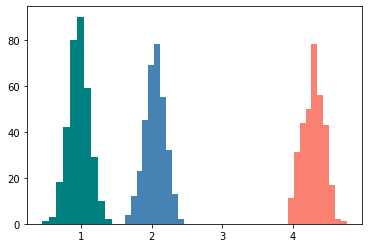

In [214]:
# Fit our 1D data using a Gaussian Mixture Model, performs soft clustering
gmm = GaussianMixture(n_components=3).fit(x)
# Predict the labels
labels = gmm.predict(x)
print("Converged ",gmm.converged_)
plt.hist(x[labels == 0], color='steelblue')
plt.hist(x[labels == 1], color='salmon')
plt.hist(x[labels == 2], color='teal')

Initialization 0
Initialization converged: True
Converged  True


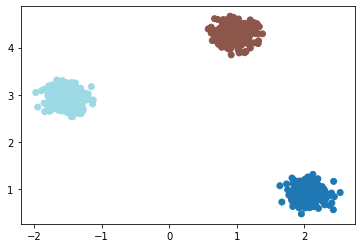

In [149]:
gmm = GaussianMixture(n_components=3, verbose=True).fit(x2)
labels = gmm.predict(x2)
print("Converged ", gmm.converged_)
plt.scatter(x2[:,0], x2[:,1], c=labels, cmap='tab20')

#### Get Model Parameters

In [219]:
from pprint import pprint
print("\n--------- GMM parameters ---------")
pprint(gmm.get_params())
print("\n--------- Weights -------")
pprint(gmm.weights_)
print("\n--------- Means of the Gaussians -------")
pprint(gmm.means_)


--------- GMM parameters ---------
{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 3,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

--------- Weights -------
array([0.33302112, 0.333     , 0.33397888])

--------- Means of the Gaussians -------
array([[2.04597142],
       [4.28787628],
       [0.97259314]])


#### Get AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion)

In [151]:
# AIC on the correct data
print("AIC - ",gmm.aic(x2[x2_label == 2]))
print("AIC - ",gmm.aic(x2))
# AIC on out-of-sample data that does not fit the model
print("AIC on out-of-sample data - ",gmm.aic(x3))

# BIC on the correct data
print("BIC - ",gmm.bic(x2[x2_label == 2]))
print("BIC - ",gmm.bic(x2))
# BIC on out-of-sample data that does not fit the model
print("BIC on out-of-sample data - ",gmm.bic(x3))

AIC -  100.3561997785441
AIC -  212.98936251809602
AIC on out-of-sample data -  7132.153377493014
BIC -  165.09462210821164
BIC -  296.42120226079237
BIC on out-of-sample data -  7164.657768585293


#### Cross-validation for Number of Clusters

In [152]:
gmm_models = [GaussianMixture(n_components=i, verbose=True).fit(x2) for i in range(1,7)]

Initialization 0
Initialization converged: True
Initialization 0
Initialization converged: True
Initialization 0
Initialization converged: True
Initialization 0
Initialization converged: True
Initialization 0
Initialization converged: True
Initialization 0
Initialization converged: True


Text(0, 0.5, 'Log of BIC scores')

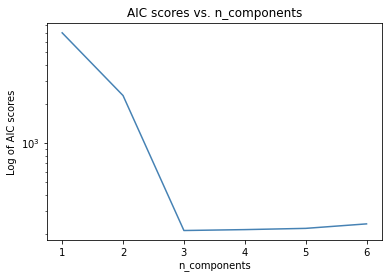

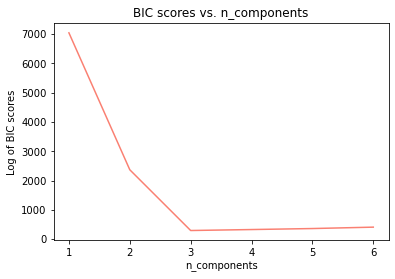

In [153]:
aic_vals = [model.aic(x2) for model in gmm_models]
bic_vals = [model.bic(x2) for model in gmm_models]
plt.plot(range(1,7), aic_vals, color='steelblue')
plt.title('AIC scores vs. n_components')
plt.yscale('log')
plt.ylabel('Log of AIC scores')
plt.xlabel('n_components')
plt.figure()
plt.plot(range(1,7),bic_vals, color='salmon')
plt.title('BIC scores vs. n_components')
plt.xlabel('n_components')
plt.ylabel('Log of BIC scores')

### Nonparametric Methods

**Reference**

* Pattern Recognition and Machine Learning by Christopher M. Bishop

In parametric methods, we assumed that the data was modeled by distributions with a finite number of parameters whose values were then estimated from the data. The limitation with this approach is that we assume that we know the best distribution to use for the data. Non-parametric methods make no such assumption and an example of such a method is the histogram. Histograms paritition the data into bins and count the data that falls into each bin. This is usually represented visually using bars. One of the concerns with a histogram is the choice of the bin width, too small of a bin will result in a spiky graph and too wide a bin results in important information being smoothed out. 
The other problem with binning is bin placement; depending on where the bins are placed one can obtain drastically different looking histograms.

### Kernel Density Estimation

As mentioned above, histograms are very sensitive to

* Your choice of bin size
* Bin placement

Another alternative to a histogram and using binning is to place a kernel at each data point and sum up the values of the kernel at each point in the data set. This results in a much smoother graph of the distribution and is not dependent on bin size or placement. The width of the kernel, however, does have an impact on the shape of the distribution. One of the commonly used kernels is the Gaussian kernel and we will see how it can used to get a visual estimation of the data distribution as shown below.

#### Python Code to Estimate the Density

Text(0.5, 1.0, 'KDE in log scale vs. x')

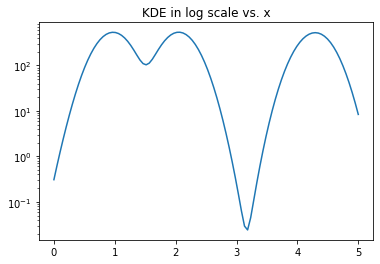

In [154]:
from scipy.stats import norm
x_range = np.linspace(0,5,100)
density_estimate = sum(norm(elem, scale=0.2).pdf(x_range) for elem in x)
plt.plot(x_range, density_estimate)
plt.yscale('log') # try linear and log scale
plt.title('KDE in log scale vs. x')

#### Scikit-learn to Estimate the Density

You can also use the Scikit-learn implementation of the Kernel Density Estimator
Valid kernels are [‘gaussian’|’tophat’|’epanechnikov’|’exponential’|’linear’|’cosine’]

Text(0.5, 1.0, 'Log probability of KDE vs. x')

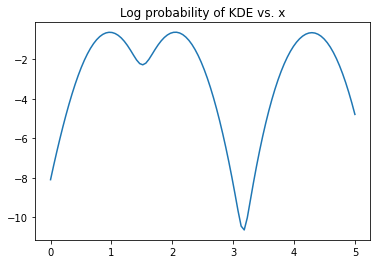

In [155]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth=0.2, kernel='gaussian')
kde.fit(x)
logprob = kde.score_samples(x_range[:,None])
plt.plot(x_range, logprob)
plt.title('Log probability of KDE vs. x')

### UNGRADED EVALUATION (20 mins)

1. Change the bandwidth for both codes and see how the KDE changes

2. Change the kernel type for the scikit-learn implementation and note how the KDE changes


### GRADED EVALUATION (15 mins)

1. One of the concerns with using a histogram is the choice of bin width that needs to be empirically determined

    a. True
    
    b. False
    
    
2. Large bin widths result in spiky distributions

    a. True
    
    b. False
    
    
3. The choice of bin placement can change what a histogram looks like

    a. True
    
    b. False
    
    
4. Kernel Density Estimation does not depend on bin width

    a. True
    
    b. False
    
    
5. The width of the kernel in KDE has an impact on the shape of the distribution represented by the KDE

    a. True
    
    b. False